In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from PIL import Image
from PIL import UnidentifiedImageError
from skimage import color

In [2]:
main_path = "datasets/incidents/"
classes = os.listdir(main_path)
classes = classes[1:]
print(classes)

['ice storm', 'car accident', 'oil spill', 'wildfire', 'earthquake', 'airplane accident', 'volcanic eruption', 'collapsed', 'tornado', 'nuclear explosion', 'bicycle accident', 'flooded']


In [3]:
images = []
images_error = []
paths = [main_path + classes[i] + '/' for i in range(len(classes))]

for p in paths:
    for path, dirs, files in os.walk(p):
        for filename in files:
            try:
              im = Image.open(p + filename)
              images.append([im,paths.index(p)])
            except UnidentifiedImageError:
              images_error.append(p + filename) 

In [4]:
df = pd.DataFrame(images, columns=['Images', 'Labels'])
df

,Images,Labels
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,0
...,...,...
7353,<PIL.PngImagePlugin.PngImageFile image mode=RG...,11
7354,<PIL.JpegImagePlugin.JpegImageFile image mode=...,11
7355,<PIL.JpegImagePlugin.JpegImageFile image mode=...,11
7356,<PIL.JpegImagePlugin.JpegImageFile image mode=...,11


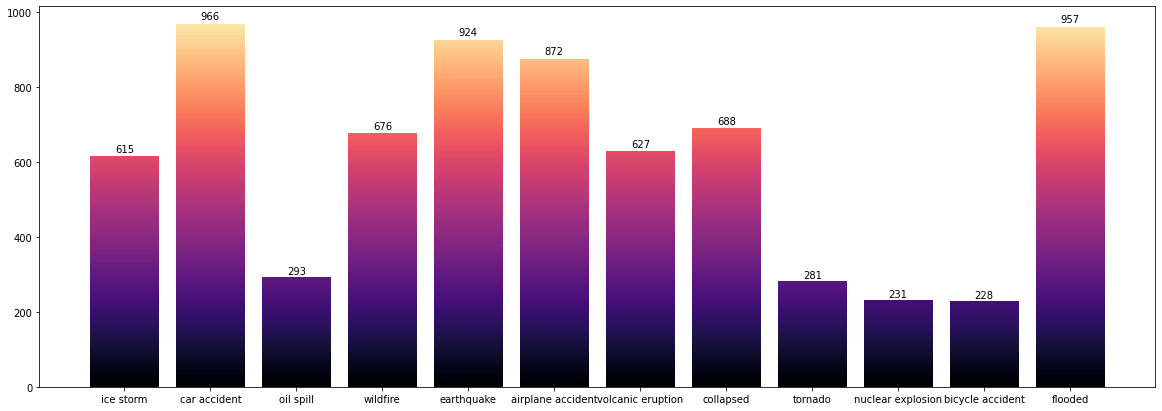

In [5]:
fig, ax = plt.subplots(1,1,figsize=(20,7))
rects = plt.bar(classes,df["Labels"].value_counts().sort_index())

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.01*height, '%d'%int(height),
                ha='center', va='bottom')
 
autolabel(rects)

def gradientbars_sliced(bars):
    ax = bars[0].axes
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor("none")
        x, y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        grad = np.linspace(y, y + h, 256).reshape(256, 1)
        ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0, origin='lower',
                  vmin=ymin, vmax=ymax, cmap='magma')
    ax.axis([xmin, xmax, ymin, ymax])

gradientbars_sliced(rects)
plt.show()

In [6]:
class_counts = df["Labels"].value_counts()
samples_class = [df[df["Labels"] == i] for i in range(len(classes))]

In [7]:
classes_under = [samples_class[i].sample(df[df["Labels"] == classes.index("bicycle accident")].shape[0]) for i in range(len(classes))]
under_df = pd.concat(classes_under,axis=0).reset_index()

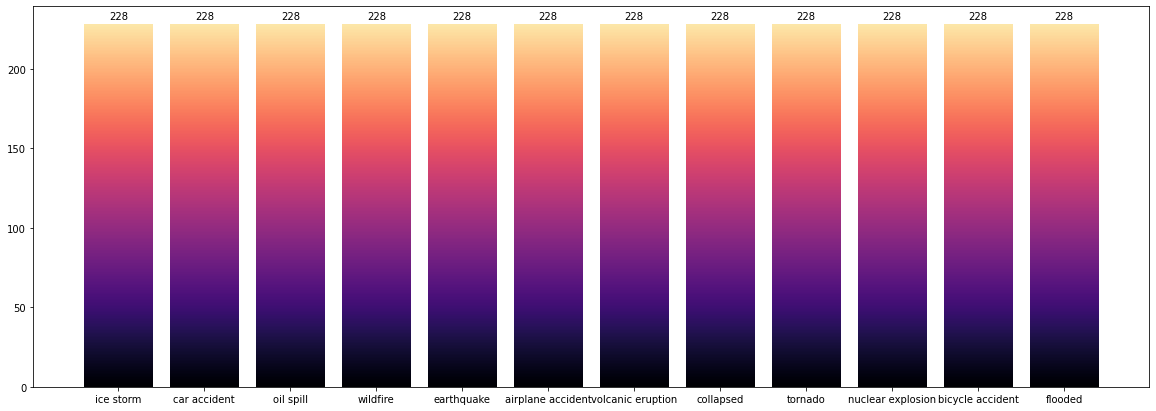

In [8]:
fig, ax = plt.subplots(1,1,figsize=(20,7))
rects = plt.bar(classes,under_df["Labels"].value_counts().sort_index())
autolabel(rects)
gradientbars_sliced(rects)
plt.show()

In [9]:
for i in range(len(images)):
    images[i][0] = images[i][0].resize((256,256), Image.NEAREST)

In [10]:
for i in range(len(images)):
    images[i][0] = np.array(images[i][0])

In [11]:
new_df = pd.DataFrame(images, columns=['Images', 'Labels'])
new_df

,Images,Labels
0,"[[[61, 63, 62], [52, 54, 53], [52, 54, 53], [6...",0
1,"[[[66, 64, 65], [60, 60, 68], [111, 114, 129],...",0
2,"[[[66, 59, 53], [36, 35, 30], [39, 34, 30], [3...",0
3,"[[[1, 1, 0], [0, 0, 12], [0, 2, 7], [0, 1, 7],...",0
4,"[[[75, 74, 69], [57, 56, 54], [105, 103, 104],...",0
...,...,...
7353,"[[[157, 175, 197, 255], [157, 175, 197, 255], ...",11
7354,"[[[231, 231, 229], [228, 230, 229], [225, 229,...",11
7355,"[[[222, 249, 255], [223, 248, 255], [230, 249,...",11
7356,"[[[209, 207, 208], [209, 207, 208], [207, 205,...",11


In [12]:
for i in range(len(images)):
    if (len(images[i][0].shape) == 3):
        if (images[i][0].shape[2] == 4):
            images[i][0] = color.rgba2rgb(images[i][0])
    else:
        images[i][0] = color.gray2rgb(images[i][0])

In [13]:
final_df = pd.DataFrame(images, columns=['Images', 'Labels'])

In [14]:
final_df

,Images,Labels
0,"[[[61, 63, 62], [52, 54, 53], [52, 54, 53], [6...",0
1,"[[[66, 64, 65], [60, 60, 68], [111, 114, 129],...",0
2,"[[[66, 59, 53], [36, 35, 30], [39, 34, 30], [3...",0
3,"[[[1, 1, 0], [0, 0, 12], [0, 2, 7], [0, 1, 7],...",0
4,"[[[75, 74, 69], [57, 56, 54], [105, 103, 104],...",0
...,...,...
7353,"[[[0.615686274509804, 0.6862745098039216, 0.77...",11
7354,"[[[231, 231, 229], [228, 230, 229], [225, 229,...",11
7355,"[[[222, 249, 255], [223, 248, 255], [230, 249,...",11
7356,"[[[209, 207, 208], [209, 207, 208], [207, 205,...",11


In [15]:
floats = []
for i in range(len(images)):
    if (final_df["Images"][i].dtype != 'uint8'):
        floats.append(i)

In [16]:
floats

[77,
 113,
 649,
 871,
 1117,
 1278,
 1352,
 1370,
 1401,
 1464,
 1549,
 1689,
 1760,
 1780,
 1984,
 2066,
 2069,
 2147,
 2175,
 2283,
 2303,
 2351,
 2406,
 2472,
 2712,
 3047,
 3093,
 3098,
 3148,
 3173,
 3283,
 3404,
 3541,
 3542,
 3636,
 3821,
 3935,
 4144,
 4239,
 4243,
 4511,
 4575,
 4606,
 4673,
 4914,
 5041,
 5308,
 5396,
 5585,
 5762,
 5783,
 5990,
 6013,
 6025,
 6354,
 6388,
 6414,
 6446,
 6517,
 6654,
 6856,
 6883,
 7014,
 7030,
 7039,
 7071,
 7353]

In [17]:
#final_df.to_csv("incidents2.csv")